In [4]:
import pandas as pd
pd.set_option('Display.max_columns', None)
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('EXPERT_COMPTABLE_AVANT_DERNIER.csv')

In [6]:
df

,First Name,Last Name,contact_type,age,date_de_naissance,linkedin_profil_url,company_name,web_site,industry,adresse,city,Postal Code,nb_employe (pappers),nb_employe (linkedin),CA,resultat_net,linkedin_company_url,ebitda,nb_EC,papers_link,telephone
0,Claude,Boulic,Accountant,56.0,12/1967,NaN,FINANCIA EXPERT,http://www.groupe-etc.fr,Accounting,"4 RUE DES FROMENTAUX, 21121 AHUY",AHUY,21121.0,Entre 20 et 49 salariés,11-50 employés,3070000.0,134000.0,https://www.linkedin.com/company/financia-expert/,164000.0,1.0,https://www.pappers.fr/entreprise/financia-exp...,03 80 56 06 06
1,Severine,Ferreira,Accountant,45.0,09/1978,https://www.linkedin.com/in/s%C3%A9verine-oill...,FINANCIA EXPERT,http://www.groupe-etc.fr,Accounting,"4 RUE DES FROMENTAUX, 21121 AHUY",AHUY,21121.0,Entre 20 et 49 salariés,11-50 employés,3070000.0,134000.0,https://www.linkedin.com/company/financia-expert/,164000.0,1.0,https://www.pappers.fr/entreprise/financia-exp...,03 80 56 06 06
2,Stephane,Delzaive,Accountant,49.0,09/1974,NaN,FINANCIA EXPERT,http://www.groupe-etc.fr,Accounting,"4 RUE DES FROMENTAUX, 21121 AHUY",AHUY,21121.0,Entre 20 et 49 salariés,11-50 employés,3070000.0,134000.0,https://www.linkedin.com/company/financia-expert/,164000.0,1.0,https://www.pappers.fr/entreprise/financia-exp...,03 80 56 06 06
3,Enis,Dzogovic,Accountant,42.0,12/1981,https://www.linkedin.com/in/enis-dzogovic-4645...,FINANCIA EXPERT,http://www.groupe-etc.fr,Accounting,"4 RUE DES FROMENTAUX, 21121 AHUY",AHUY,21121.0,Entre 20 et 49 salariés,11-50 employés,3070000.0,134000.0,https://www.linkedin.com/company/financia-expert/,164000.0,1.0,https://www.pappers.fr/entreprise/financia-exp...,03 80 56 06 06
4,Sandra,Faoro,Accountant,52.0,02/1972,NaN,FINANCIA EXPERT,http://www.groupe-etc.fr,Accounting,"4 RUE DES FROMENTAUX, 21121 AHUY",AHUY,21121.0,Entre 20 et 49 salariés,11-50 employés,3070000.0,134000.0,https://www.linkedin.com/company/financia-expert/,164000.0,1.0,https://www.pappers.fr/entreprise/financia-exp...,03 80 56 06 06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,Méline,Trinh,Accountant,40.0,10/1983,NaN,TF EXPERTISE,NaN,Accounting,"171 AV DU GENERAL LECLERC, 94700 MAISONS-ALFORT",MAISONS-ALFORT,94700.0,0 salarié,NaN,NaN,NaN,NaN,NaN,1.0,https://www.pappers.fr/entreprise/tf-expertise...,06 21 38 35 94
14602,Redouan,Bensaid,Accountant,30.0,01/1994,NaN,MNA CONSULTING,NaN,Accounting,"BUREAU 3, 6 RUE DES BATELIERS, 92110 CLICHY",CLICHY,92110.0,0 salarié,NaN,NaN,NaN,NaN,NaN,1.0,https://www.pappers.fr/entreprise/mna-consulti...,06 63 24 00 64
14603,Alix,Tissandier,Accountant,29.0,07/1994,NaN,HOLDAT,NaN,Accounting,"4 PL BARTHELEMY NIOLLON, 13100 AIX-EN-PROVENCE",AIX-EN-PROVENCE,13100.0,0 salarié,NaN,NaN,NaN,NaN,NaN,1.0,https://www.pappers.fr/entreprise/holdat-98503...,06 26 46 84 30
14604,Barbara,Bruel,Accountant,31.0,01/1993,https://www.linkedin.com/in/barbara-bruel?mini...,CABINET BRUEL,NaN,Accounting,"7 AV DE LAMBALLE, 75016 PARIS 16",PARIS,75016.0,0 salarié,NaN,NaN,NaN,NaN,NaN,1.0,https://www.pappers.fr/entreprise/cabinet-brue...,06 65 72 99 94


In [7]:
test = df[['age','city','nb_employe (pappers)','nb_EC','ebitda']]

In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   14601 non-null  float64
 1   city                  14601 non-null  object 
 2   nb_employe (pappers)  14606 non-null  object 
 3   nb_EC                 14541 non-null  float64
 4   ebitda                7222 non-null   float64
dtypes: float64(3), object(2)
memory usage: 570.7+ KB


In [11]:
test = test.dropna()

In [12]:
test

,age,city,nb_employe (pappers),nb_EC,ebitda
0,56.0,AHUY,Entre 20 et 49 salariés,1.0,164000.0
1,45.0,AHUY,Entre 20 et 49 salariés,1.0,164000.0
2,49.0,AHUY,Entre 20 et 49 salariés,1.0,164000.0
3,42.0,AHUY,Entre 20 et 49 salariés,1.0,164000.0
4,52.0,AHUY,Entre 20 et 49 salariés,1.0,164000.0
...,...,...,...,...,...
13964,54.0,PARIS,Entre 6 et 9 salariés,4.0,145000.0
13965,57.0,LYON,Entre 6 et 9 salariés,2.0,-60800.0
13968,86.0,LYON,Entre 3 et 5 salariés,1.0,1700.0
13969,48.0,ECULLY,Entre 6 et 9 salariés,2.0,-193000.0


In [13]:
import re

def moyenne_nombre_employes(text):
    # Utiliser une expression régulière pour trouver tous les nombres dans le texte
    nombres = re.findall(r'\d+', text)
    
    # Convertir les résultats de texte à entier
    nombres = [int(n) for n in nombres]
    
    # Calculer la moyenne si on a exactement deux nombres
    if len(nombres) == 2:
        return sum(nombres) / 2
    else:
        return nombres[0]

In [14]:
test['estimation employe'] = test['nb_employe (pappers)'].apply(moyenne_nombre_employes)

In [15]:
test.drop(columns='nb_employe (pappers)', inplace=True)

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
test['city_encoded'] = le.fit_transform(test['city'])

In [30]:
x = test[['age','city_encoded','estimation employe','nb_EC']]

In [35]:
# convert type in numeric

x = x.astype('float64')

In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7181 entries, 0 to 14605
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 7181 non-null   float64
 1   city_encoded        7181 non-null   float64
 2   estimation employe  7181 non-null   float64
 3   nb_EC               7181 non-null   float64
dtypes: float64(4)
memory usage: 280.5 KB


In [42]:
x

,age,city_encoded,estimation employe,nb_EC
0,56.0,5.0,34.5,1.0
1,45.0,5.0,34.5,1.0
2,49.0,5.0,34.5,1.0
3,42.0,5.0,34.5,1.0
4,52.0,5.0,34.5,1.0
...,...,...,...,...
13964,54.0,813.0,7.5,4.0
13965,57.0,638.0,7.5,2.0
13968,86.0,638.0,4.0,1.0
13969,48.0,400.0,7.5,2.0


In [55]:
from kmodes.kprototypes import KPrototypes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 9997647.89375547
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 0, ncost: 9997647.89375547
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 0, ncost: 9997647.89375547
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 0, ncost: 9997647.89375547
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 5, iteration: 1/100, moves: 0, ncost: 9997647.89375547
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 6, iteration: 1/100, moves: 0, ncost: 9997647.89375547
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run:

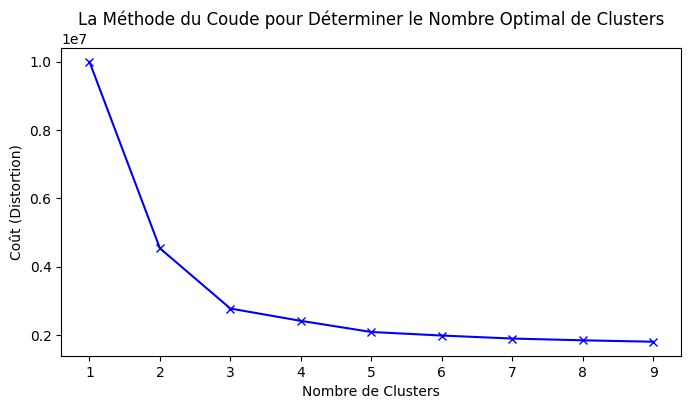

In [51]:
costs = []
K = range(1, 10)  # Testez de 1 à 9 clusters, par exemple

x['city_encoded'] = x['city_encoded'].astype(int).astype('category')
x_array = x.values
categorical_indices= [1]

for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=1)
    kproto.fit_predict(x_array, categorical=categorical_indices)
    costs.append(kproto.cost_)

# Visualisation des coûts
plt.figure(figsize=(8, 4))
plt.plot(K, costs, 'bx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Coût (Distortion)')
plt.title('La Méthode du Coude pour Déterminer le Nombre Optimal de Clusters')
plt.show()

In [49]:
categorical_indices = [1]  
kproto = KPrototypes(n_clusters=3, init='Cao', verbose=2)
clusters = kproto.fit_predict(x_array, categorical=categorical_indices)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 1545, ncost: 2441380.347328562
Run: 1, iteration: 2/100, moves: 791, ncost: 2415555.105386433
Run: 1, iteration: 3/100, moves: 266, ncost: 2412695.3930720626
Run: 1, iteration: 4/100, moves: 158, ncost: 2411584.8043164387
Run: 1, iteration: 5/100, moves: 0, ncost: 2411584.8043164387
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1120, ncost: 3543561.498925679
Run: 2, iteration: 2/100, moves: 743, ncost: 3139037.91057351
Run: 2, iteration: 3/100, moves: 453, ncost: 2411679.1530577615
Run: 2, iteration: 4/100, moves: 0, ncost: 2411679.1530577615
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
R

In [54]:
print("Centres des Clusters:\n", kproto.cluster_centroids_)
print("Affectations des clusters:", clusters)

Centres des Clusters:
 [[ 51.98482293  43.30269815   2.85413153 813.        ]
 [ 50.06701031 185.84020619   5.73195876 966.        ]
 [ 51.93277021   4.69505258   1.83847612 813.        ]]
Affectations des clusters: [1 1 1 ... 0 2 2]


In [64]:
x

,age,city_encoded,estimation employe,nb_EC
0,56.0,5,34.5,1.0
1,45.0,5,34.5,1.0
2,49.0,5,34.5,1.0
3,42.0,5,34.5,1.0
4,52.0,5,34.5,1.0
...,...,...,...,...
13964,54.0,813,7.5,4.0
13965,57.0,638,7.5,2.0
13968,86.0,638,4.0,1.0
13969,48.0,400,7.5,2.0


In [60]:
y = test['ebitda']

In [63]:
# regression lineaire 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))



Mean Squared Error: 256908021536.2772
R2 Score: 0.18343721774314448
